In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

## 回归树

In [51]:
iris_dataset = load_iris()

X, y = iris_dataset['data'], iris_dataset['target']

X = pd.DataFrame(X, columns = iris_dataset['feature_names'])
y = pd.DataFrame(y, columns = ['Type'])

iris_df = X.join(y)

iris_df = iris_df[iris_df['Type'] != 0]
iris_df = iris_df.drop(['sepal width (cm)', 'petal length (cm)'], axis = 1)

iris_df['petal width (cm)'] = iris_df.apply(lambda row : row['petal width (cm)'] + 0.15 if row['Type'] == 1 else row['petal width (cm)'], axis = 1)

iris_df

,sepal length (cm),petal width (cm),Type
50,7.0,1.55,1
51,6.4,1.65,1
52,6.9,1.65,1
53,5.5,1.45,1
54,6.5,1.65,1
...,...,...,...
145,6.7,2.30,2
146,6.3,1.90,2
147,6.5,2.00,2
148,6.2,2.30,2


## 二特征预测

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

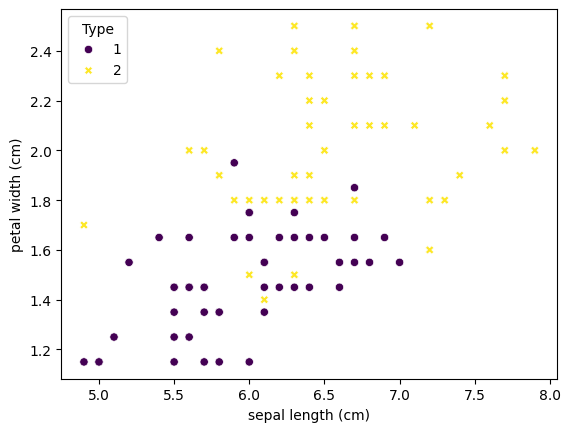

In [52]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'petal width (cm)', hue = 'Type',
                style = 'Type', palette = 'viridis')

In [53]:
X = iris_df.drop(['Type'], axis = 1)
y = iris_df[['Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13456)

clf = DecisionTreeClassifier()

y_pred = clf.fit(X_train, y_train).predict(X_test)

clf.score(X_test, y_test)

0.7666666666666667

In [54]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.67      0.83      0.74        12
           2       0.87      0.72      0.79        18

    accuracy                           0.77        30
   macro avg       0.77      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30



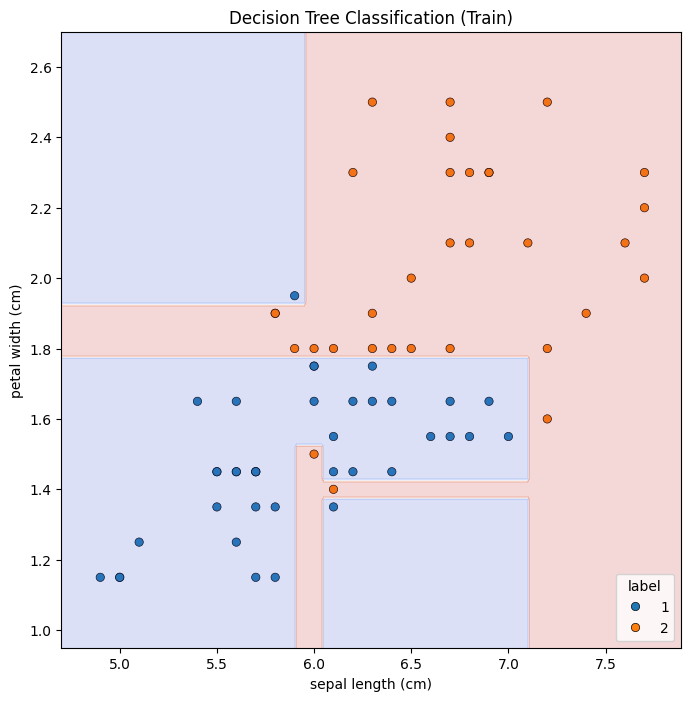

In [55]:
import sys
sys.path.append("../..")

from ToolKit.ML import plot_decision_boundary2F2D

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train)')

In [56]:
export_graphviz(clf, out_file = 'Iris_tree_default.dot', 
                feature_names = X_train.columns,
                class_names = y_train['Type'].astype(str).unique(),
                filled = True)

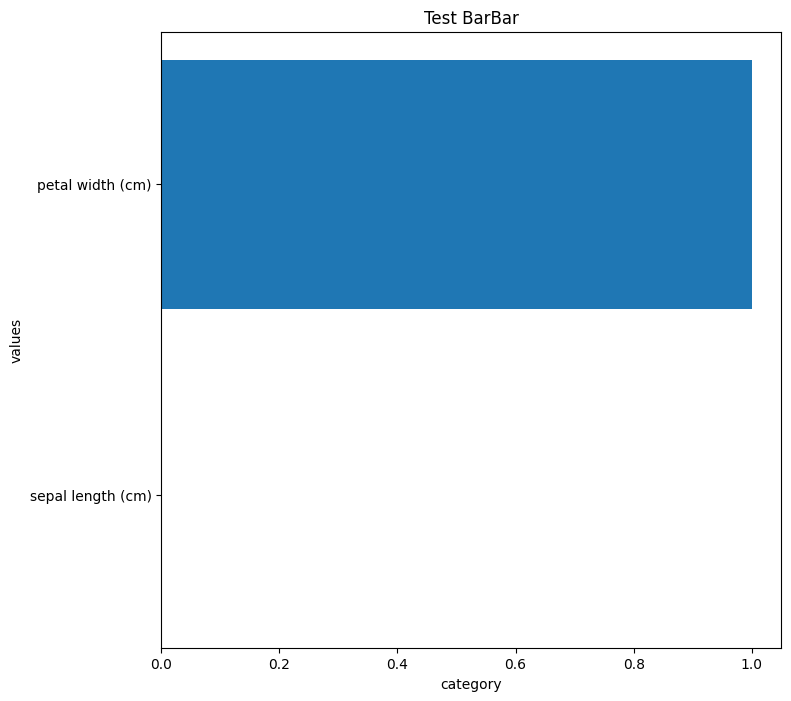

In [62]:
importance = clf.feature_importances_

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.barh(y = X_train.columns, width = importance)

ax.set_title('Test BarBar')
ax.set_xlabel('category')
ax.set_ylabel('values')

plt.show()

In [57]:
clf = DecisionTreeClassifier(max_depth = 3)

y_pred = clf.fit(X_train, y_train).predict(X_test)

clf.score(X_test, y_test)

0.8

In [58]:
export_graphviz(clf, out_file = 'Iris_tree_d3.dot', 
                feature_names = X_train.columns,
                class_names = y_train['Type'].astype(str).unique(),
                filled = True)

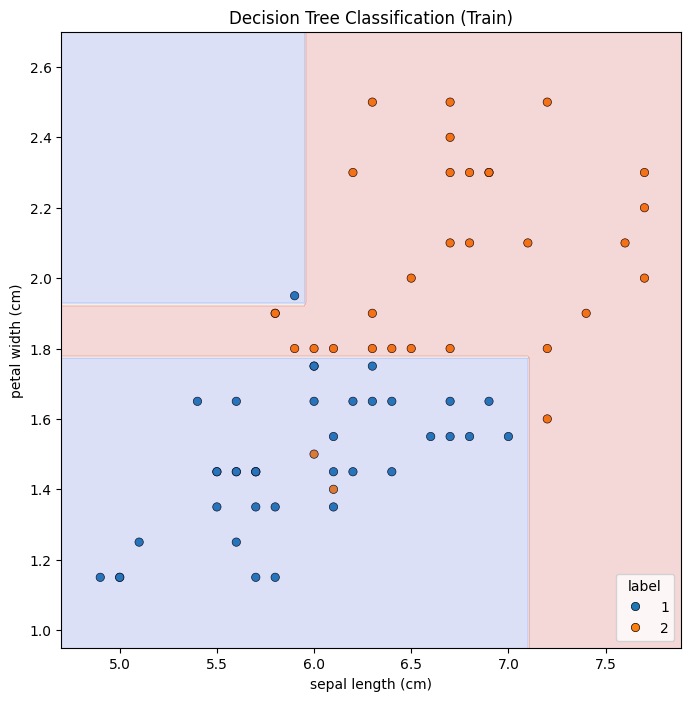

In [59]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train)')

In [60]:
clf = DecisionTreeClassifier(max_depth = 1)

y_pred = clf.fit(X_train, y_train).predict(X_test)

clf.score(X_test, y_test)

0.9

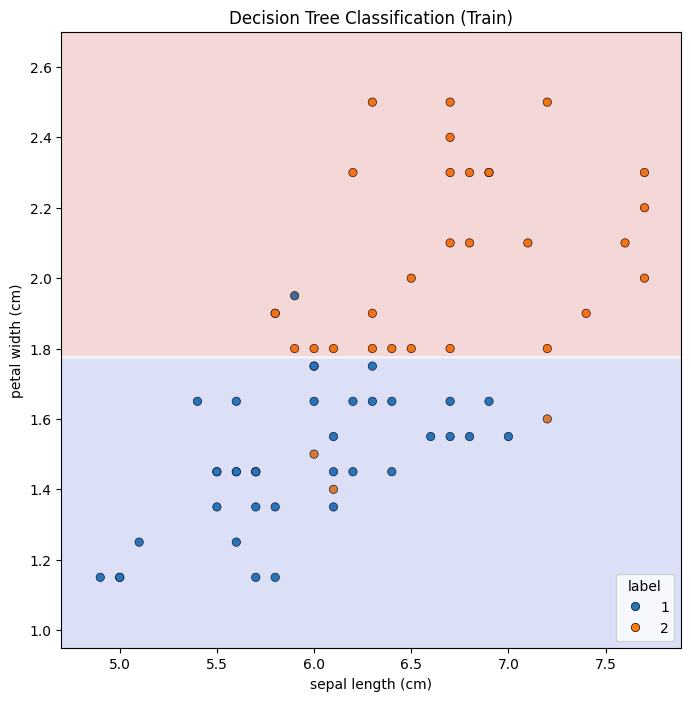

In [61]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train)')